# Exercise 05.1

## Sampling first two hydrogen wavefunction with the Metropolis algorithm

### Brief theoritical background
The system considered is a hydrogen atom, which is described (in the quantum mechanics framework) by its wavefunction $\Psi_N(\vec r, t)$. 

We are interested in computing the mean radial position of the ground state ($\Psi_{1,0,0}(r,\theta,\phi)$ and of the first excited state ($\Psi_{2,1,0}(r,\theta,\phi)$); thankfully, we have their respective analytic form, expressed in Bohr units $a_0= 4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$: 
- **ground state**: $\Psi_{1,0,0}(r,\theta,\phi)=\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0},$
- **first excited**: $\Psi_{2,1,0}(r,\theta,\phi)= \frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta).$

They are time independent (being eigenstates of the hamiltonian), and the theoritical expectation values for mean radial position at any time are: 
- **ground state**: $\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0$
- **first excited**: $\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0$

### Metropolis algorithm

The Metropolis algorithm is a sampling method applicable to any distribution for any number N of dimensions.
Given a distribution to be sampled $f(\vec x)$ where $ x $ is a multidimensional vector  and $T(x|y)$ a transition probability, the algorithm works as follows.

After have choose starting point $x_0$ the next step $x$ is randomly drawn from a statistical distribution $T(x|y)$, with a probability $A = \mathrm{min}[1,\frac{T(y|x) f(x)}{T(x|y) f(y)}$].

The choice of transition probability T is important in terms of the efficiency of the process. In our case we choose symmetric distributions where T(x|y)=T(y|x). We apply the Metropolis algorithm to find the mean value of some radial wave functions of the hydrogen atom states 1s and 2p.

This algorithm is a **Markov chain**, i.e. the next step $x_{i+1}$ hangs from the previous one $x_i$. The choice of step length is crucial in order to best expose the domain of the distribution. A step that is too small is equivalent to a slow exploration, while one that is too wide tends to exit the equilibrium points of the distribution. The step value is chosen in order to have an occurrence-to-total ratio of approximately 50%.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 22})
from mpl_toolkits.mplot3d import Axes3D
a0 =0.0529


### Equilibration
In the following calculations we performed how much the initial position can influence the final result and the importance to equilibrate the system if the initalia value is far away from the expected one.
The following analisys compute the comulative average for the radius fo the state $\Psi_{1,0,0}$ of the hidrogenoid atom. The equilibrium is reached very easily for the initial position close to the final one. 
We used 100 blocks each one of 1000 throws.

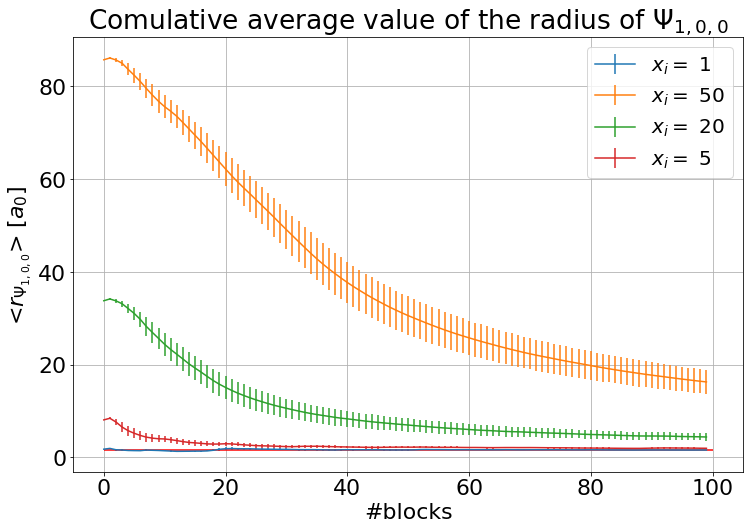

In [3]:
pos = {1, 5, 20, 50}
plt.figure(figsize=(12, 8))
plt.title("Comulative average value of the radius of $\Psi_{1,0,0}$")

for el in pos:
    x, rad,rad_err = np.loadtxt(f"./data/output_rad_varx_{el}.dat", usecols=(0,1,2), unpack='true')
    plt.errorbar(x,rad,yerr=rad_err,label=f"$x_i = $ {el}")
plt.xlabel('#blocks')
plt.ylabel('<$r_{\Psi_{1,0,0}}$> [$a_0$]')
plt.grid(True)
plt.legend(prop={'size': 20})
plt.hlines(3/2,0,100,color ="red",label="Analytical value")
plt.show()

The time of equilibration is strongly dependent to the initial position of chosen. In the following calculation we used $x_i$ = 1 mean $\sqrt{x_0^2+x_1^2+x_3^3} = \sqrt3$ which doesn't require any specific of equilibration (blue line).

#### Metropolis Markov chain - Anti-correlation

Being a Metropolis Markov chain, each block need a minimum number of throws to have an output which don't correlate with the input conditions. If we consider 100 blocks the number of throws for each ones have to be above 10000. Because the lack of statistics needed to equilibrate each block, the lines blue and orange presents high fluctuations. The green trend gives a perfect correlation with the analitycal value. We need take the scenario with 100000 steps.

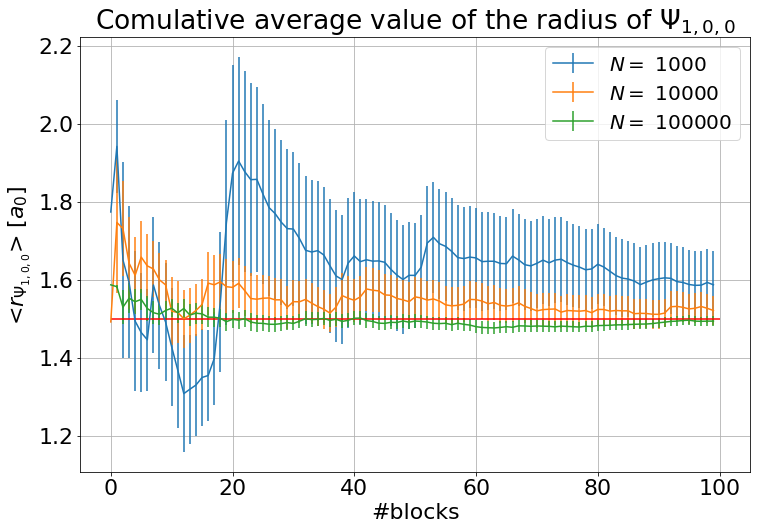

In [10]:
nsteps = {1000, 10000,100000}
plt.figure(figsize=(12, 8))
plt.title("Comulative average value of the radius of $\Psi_{1,0,0}$")
plt.rcParams.update({'font.size': 22})
for el in nsteps:
    x, rad,rad_err = np.loadtxt(f"./data/output_rad_stat_{el}.dat", usecols=(0,1,2), unpack='true')
    plt.errorbar(x,rad,yerr=rad_err,label=f"$N = $ {el}")
plt.xlabel('#blocks')
plt.ylabel('<$r_{\Psi_{1,0,0}}$> [$a_0$]')
plt.grid(True)
plt.legend(prop={'size': 20})
plt.hlines(3/2,0,100,color ="red",label="Analytical value")
plt.show()

Below the 3D plot of the spatial distribution for $r_{1,0,0}$ and $r_{2,1,0}$.

/tmp/ipykernel_77265/2880874813.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


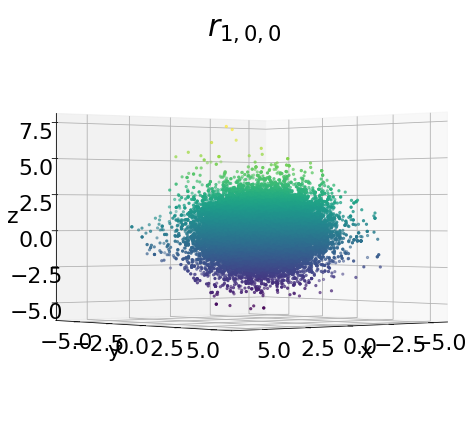

/tmp/ipykernel_77265/2880874813.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


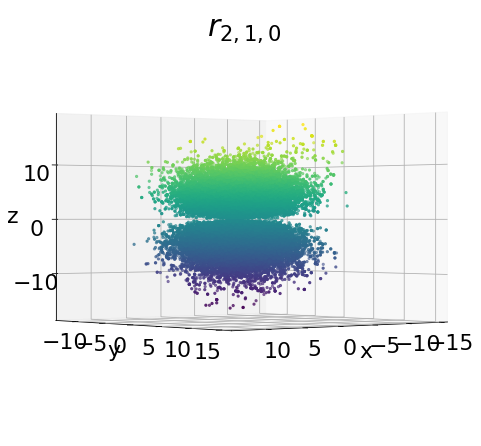

In [14]:
X,Y,Z= np.loadtxt("./data/output_pos_0_0.dat", usecols=(0,1,2), unpack='true')

fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
fig.suptitle('$r_{1,0,0}$', fontsize=30)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(0, 50)
plt.show()

X,Y,Z= np.loadtxt("./data/output_pos_0_1.dat", usecols=(0,1,2), unpack='true')

fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
fig.suptitle('$r_{2,1,0}$', fontsize=30)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(0, 50)
plt.show()

#### Metropolis step function
Estimations due to Metropoli algorithm with Guassian step (blue) and Uniform step (green).

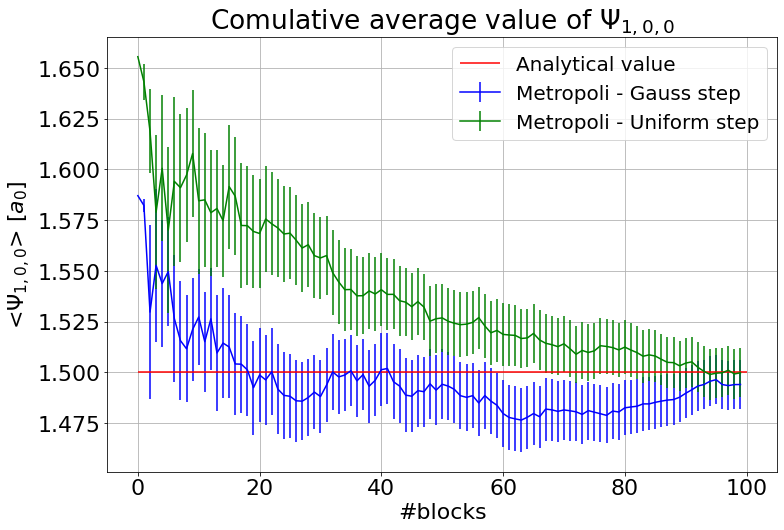

In [87]:
x_gaus, rad_gaus,rad_gaus_err = np.loadtxt("./data/output_rad_1_0.dat", usecols=(0,1,2), unpack='true')
x_unif, rad_unif,rad_unif_err = np.loadtxt("./data/output_rad_0_0.dat", usecols=(0,1,2), unpack='true')

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(12, 8))
plt.title("Comulative average value of $\Psi_{1,0,0}$")
plt.errorbar(x_gaus,rad_gaus,yerr=rad_gaus_err,color="blue",label="Metropoli - Gauss step")
plt.errorbar(x_unif,rad_unif,yerr=rad_unif_err,color="green",label="Metropoli - Uniform step")
plt.hlines(3/2,0,100,color ="red",label="Analytical value")
plt.xlabel('#blocks')
plt.ylabel('<$\Psi_{1,0,0}$> [$a_0$]')
plt.grid(True)
plt.legend(prop={'size': 20})

plt.show()

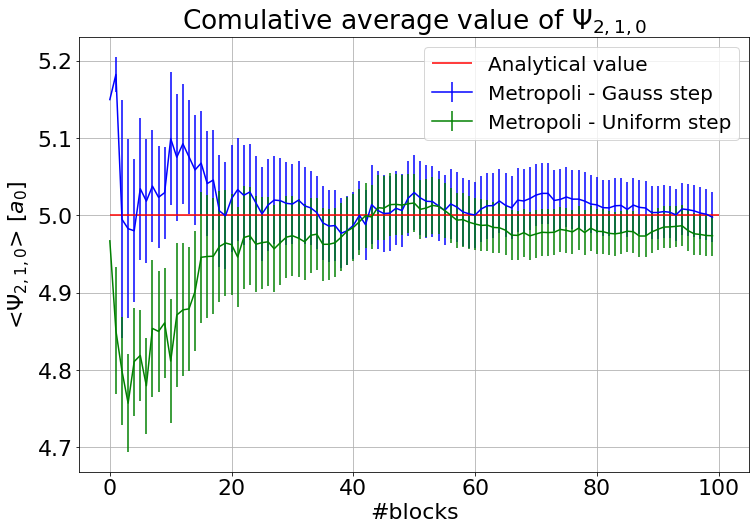

In [88]:
x_gaus, rad_gaus,rad_gaus_err = np.loadtxt("./data/output_rad_1_1.dat", usecols=(0,1,2), unpack='true')
x_unif, rad_unif,rad_unif_err = np.loadtxt("./data/output_rad_0_1.dat", usecols=(0,1,2), unpack='true')

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(12, 8))
plt.title("Comulative average value of $\Psi_{2,1,0}$")
plt.errorbar(x_gaus,rad_gaus,yerr=rad_gaus_err,color="blue",label="Metropoli - Gauss step")
plt.errorbar(x_unif,rad_unif,yerr=rad_unif_err,color="green",label="Metropoli - Uniform step")
plt.hlines(5,0,100,color ="red",label="Analytical value")
plt.xlabel('#blocks')
plt.ylabel('<$\Psi_{2,1,0}$> $[a_0]$')
plt.grid(True)
plt.legend(prop={'size': 20})

plt.show()